This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.6098 - accuracy: 0.8149 - val_loss: 0.3313 - val_accuracy: 0.8983
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2426 - accuracy: 0.9252 - val_loss: 0.2690 - val_accuracy: 0.9123
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1603 - accuracy: 0.9499 - val_loss: 0.1783 - val_accuracy: 0.9457
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1156 - accuracy: 0.9642 - val_loss: 0.1267 - val_accuracy: 0.9628
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0827 - accuracy: 0.9736 - val_loss: 0.1210 - val_accuracy: 0.9648
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0622 - accuracy: 0.9799 - val_loss: 0.1579 - val_accuracy: 0.9558
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0454 - accuracy: 0.9854 - val_loss: 0.1412 - val_accuracy: 0.9603
Epoch 

**Plotting a validation accuracy comparison**

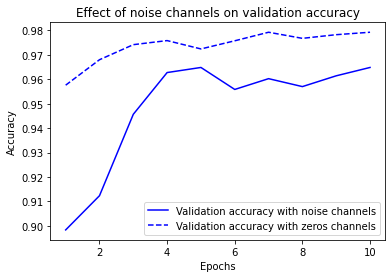

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3166 - accuracy: 0.1024 - val_loss: 2.3064 - val_accuracy: 0.1047
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2993 - accuracy: 0.1176 - val_loss: 2.3165 - val_accuracy: 0.1005
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2911 - accuracy: 0.1289 - val_loss: 2.3214 - val_accuracy: 0.1000
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2775 - accuracy: 0.1404 - val_loss: 2.3303 - val_accuracy: 0.0978
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2613 - accuracy: 0.1526 - val_loss: 2.3459 - val_accuracy: 0.0963
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2401 - accuracy: 0.1650 - val_loss: 2.3504 - val_accuracy: 0.0978
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2175 - accuracy: 0.1814 - val_loss: 2.3687 - val_accuracy: 0.0988

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 1154.7906 - accuracy: 0.4297 - val_loss: 2.0853 - val_accuracy: 0.3083
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 4.3056 - accuracy: 0.3195 - val_loss: 3.3618 - val_accuracy: 0.2767
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9163 - accuracy: 0.3107 - val_loss: 2.2821 - val_accuracy: 0.3622
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8953 - accuracy: 0.2950 - val_loss: 2.7679 - val_accuracy: 0.3620
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9759 - accuracy: 0.2924 - val_loss: 1.9348 - val_accuracy: 0.2840
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6346 - accuracy: 0.2918 - val_loss: 2.0249 - val_accuracy: 0.2534
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6678 - accuracy: 0.2949 - val_loss: 1.9493 - val_accuracy: 0.2603
Epo

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3626 - accuracy: 0.9126 - val_loss: 0.1781 - val_accuracy: 0.9550
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1384 - accuracy: 0.9643 - val_loss: 0.1636 - val_accuracy: 0.9628
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1155 - accuracy: 0.9728 - val_loss: 0.1628 - val_accuracy: 0.9710
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0992 - accuracy: 0.9788 - val_loss: 0.1894 - val_accuracy: 0.9688
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.9813 - val_loss: 0.2148 - val_accuracy: 0.9688
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0789 - accuracy: 0.9846 - val_loss: 0.2403 - val_accuracy: 0.9691
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9863 - val_loss: 0.2534 - val_accuracy: 0.9692
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.6620 - accuracy: 0.8367 - val_loss: 0.3574 - val_accuracy: 0.9020
Epoch 2/20
375/375 [==============================] - 0s 912us/step - loss: 0.3502 - accuracy: 0.9034 - val_loss: 0.3055 - val_accuracy: 0.9165
Epoch 3/20
375/375 [==============================] - 0s 863us/step - loss: 0.3152 - accuracy: 0.9121 - val_loss: 0.2904 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 0s 881us/step - loss: 0.2991 - accuracy: 0.9168 - val_loss: 0.2804 - val_accuracy: 0.9246
Epoch 5/20
375/375 [==============================] - 0s 917us/step - loss: 0.2896 - accuracy: 0.9189 - val_loss: 0.2765 - val_accuracy: 0.9250
Epoch 6/20
375/375 [==============================] - 0s 972us/step - loss: 0.2827 - accuracy: 0.9215 - val_loss: 0.2727 - val_accuracy: 0.9249
Epoch 7/20
375/375 [==============================] - 0s 858us/step - loss: 0.2781 - accuracy: 0.9223 - val_loss: 0.2687 - val_accuracy: 0

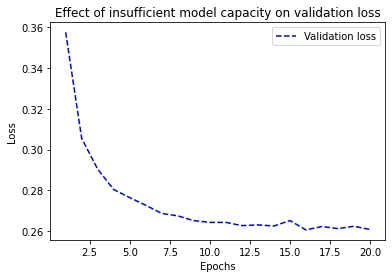

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3660 - accuracy: 0.8961 - val_loss: 0.1933 - val_accuracy: 0.9444
Epoch 2/20
375/375 [==============================] - 1s 1ms/step - loss: 0.1633 - accuracy: 0.9510 - val_loss: 0.1460 - val_accuracy: 0.9569
Epoch 3/20
375/375 [==============================] - 1s 1ms/step - loss: 0.1143 - accuracy: 0.9654 - val_loss: 0.1189 - val_accuracy: 0.9644
Epoch 4/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0887 - accuracy: 0.9739 - val_loss: 0.1099 - val_accuracy: 0.9681
Epoch 5/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0705 - accuracy: 0.9784 - val_loss: 0.0979 - val_accuracy: 0.9722
Epoch 6/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0588 - accuracy: 0.9823 - val_loss: 0.0975 - val_accuracy: 0.9732
Epoch 7/20
375/375 [==============================] - 1s 1ms/step - loss: 0.0484 - accuracy: 0.9858 - val_loss: 0.0939 - val_accuracy: 0.9742
Epoch 

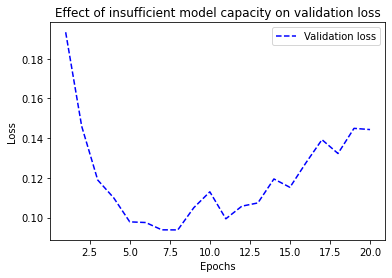

In [10]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 1s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.5036 - accuracy: 0.7873 - val_loss: 0.3730 - val_accuracy: 0.8739
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2927 - accuracy: 0.9059 - val_loss: 0.3030 - val_accuracy: 0.8849
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2124 - accuracy: 0.9311 - val_loss: 0.3260 - val_accuracy: 0.8678
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1669 - accuracy: 0.9450 - val_loss: 0.2917 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1345 - accuracy: 0.9583 - val_loss: 0.2867 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1148 - accuracy: 0.9626 - val_loss: 0.3127 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0958 - accurac

**Version of the model with lower capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.5507 - accuracy: 0.7831 - val_loss: 0.4519 - val_accuracy: 0.8543
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3840 - accuracy: 0.8879 - val_loss: 0.3659 - val_accuracy: 0.8762
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3011 - accuracy: 0.9085 - val_loss: 0.3214 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2474 - accuracy: 0.9249 - val_loss: 0.2948 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2102 - accuracy: 0.9356 - val_loss: 0.2797 - val_accuracy: 0.8931
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1826 - accuracy: 0.9444 - val_loss: 0.2759 - val_accuracy: 0.8908
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1604 - accuracy: 0.9503 - val_loss: 0.2728 - val_accuracy: 0.8927
Epoch 8/20
30

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary